# Most Streamed Spotify Songs 2023: Predicting hits (number of streams per month)

## Introduction

I'm not only a software engineer, but also a musician. I listen to Spotify for around 4+ hours a days. I decided to use Spotify report about the most popular songs in 2023 and try to predict number of listeners, maybe the next gratest hit (with ML approach).
To make it a classification problem, I bucketized number of streams per month and tred to predict the bucket

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/spotify-2023.csv', encoding = 'latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [24]:
pd.set_option('display.max_columns', None)
if df.isnull().values.any():
    print("Warning: Missing Data")
df.describe(include='all')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,months-since-release,streams-per-month,bucket
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'1kk-25kk'
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.138378e+08,67.812172,51.908709,385.187828,2.666317,56.847849,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,63.108080,1.638447e+07,NaN
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.666346e+08,86.441493,50.630241,1130.535561,6.035599,157.441749,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,133.715504,1.455589e+07,NaN
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,5.000000,2.300000e+02,NaN
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,13.000000,7.184150e+06,NaN
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,20.000000,1.246164e+07,NaN
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,164.000000,2.000000,33.000000,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,42.000000,2.070332e+07,NaN


# Data cleanup and modifications

In [5]:
# this row was corrupted, so I used the latest value from Sporify (https://open.spotify.com/track/5Ts1DYOuouQLgzTaisxWYh)
df.loc[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', 'streams'] = 228604144
df['streams'] = df['streams'].astype('int64')
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)
df['key'] = df['key'].fillna('na')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

<Axes: xlabel='bpm', ylabel='streams'>

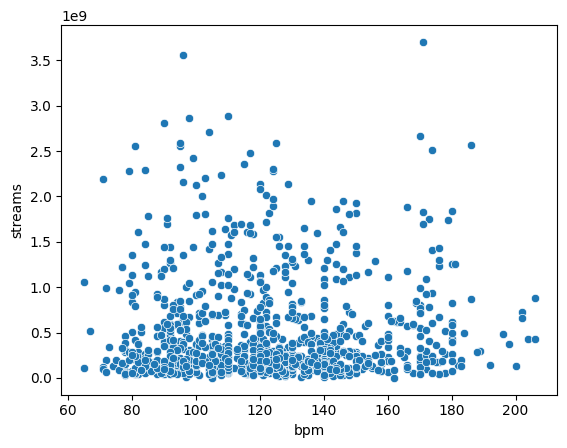

In [6]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int64')
df['in_shazam_charts'] = df['in_shazam_charts'].astype('int64')

year = 2023
last_month = 12
df['months-since-release'] = ((year - df['released_year']) * 12) + (last_month - df['released_month'])
df['streams'] = df['streams'].astype('int64')
df['streams-per-month'] = df['streams'] / df['months-since-release']
df['streams-per-month'] = df['streams-per-month'].astype('int64')
df.info()

sns.scatterplot(x='bpm', 
                y='streams', data=df)

In [7]:
df['streams-per-month'].describe()
df['streams-per-month'].describe().apply(lambda x: format(x, 'f'))

count          953.000000
mean      16384473.656873
std       14555886.950765
min            230.000000
25%        7184150.000000
50%       12461639.000000
75%       20703325.000000
max      119714156.000000
Name: streams-per-month, dtype: object

## Bucketizing

<Axes: xlabel='bucket', ylabel='count'>

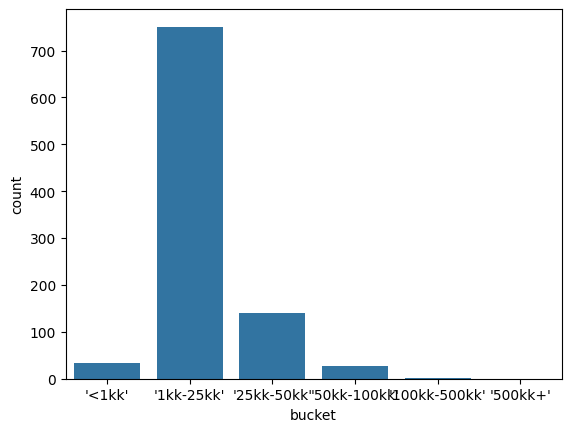

In [8]:
bins = np.array([0, 1000000, 25000000, 50000000, 100000000, 500000000, np.inf])
labels = ["'<1kk'","'1kk-25kk'","'25kk-50kk'","'50kk-100kk'","'100kk-500kk'", "'500kk+'"]
df['bucket'] = pd.cut(df['streams-per-month'], bins=bins, labels=labels)
sns.countplot(x='bucket',data=df)

## One hot encoding for key and mode

In [9]:
df_encoded = pd.get_dummies(df, columns=['key', 'mode'])
df_encoded.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,months-since-release,streams-per-month,bucket,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_na,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4,5,28276340,'25kk-50kk',False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4,9,14857365,'1kk-25kk',False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6,6,23333995,'1kk-25kk',False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15,52,15400784,'1kk-25kk',True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,65,23,80,14,63,11,6,7,43319474,'25kk-50kk',True,False,False,False,False,False,False,False,False,False,False,False,False,True


# Models

I decicded not to use any countable columns like appearance in playlists and charts, because it doesn't tell anything about music itself, but about reaction. I'll try to predict based on music features. 

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [11]:
X = df_encoded[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'key_na', 'mode_Major', 'mode_Minor']]
y = df_encoded[['bucket']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100500)

In [35]:
def show_model_results(klist, f1_test, f1_train, xlabel):
    plt.plot(klist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(klist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('Model F1 Score')

    plt.title('Results')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

### Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

0.7169187401745541
0.7151877248964628
0.7134499741503632
0.7113434510694784
0.7042661480531304
0.6973882022636085
0.7072285094368275
0.6813106150453452
0.6859091321901238
0.6805793182713378
0.649895558986468
0.6412769443138207
0.6450713042416097
0.6407848439934001
0.6475584229594925
0.6345846045409929
0.6341041718202112
0.6430622254238021
0.6377684126028497
0.6329839718127183
0.6329839718127183
0.6329839718127183
0.6329839718127183
0.6329839718127183


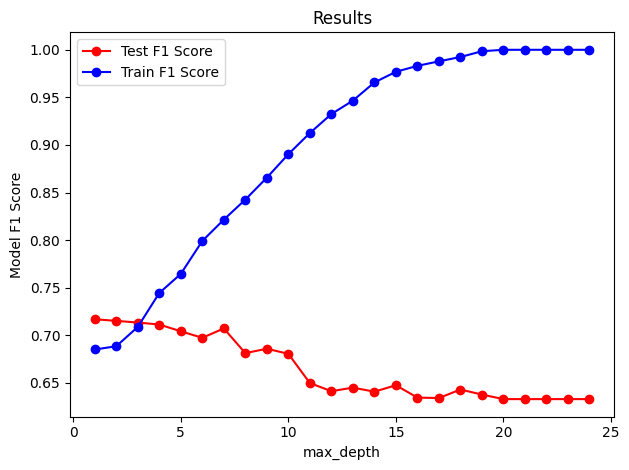

In [44]:
f1_test = []
f1_train = []
max_depth = list(range(1,25))
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i, random_state=100500, criterion='gini')
    clf = clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(klist=max_depth, f1_train=f1_train, f1_test=f1_test, xlabel='max_depth')

0.7169187401745541
0.7179368107853685
0.7134499741503632
0.7117054485475538
0.7113434510694784
0.7123647721186012
0.6769430076901031
0.6685062818537395
0.6635995583364004
0.6662722354010623
0.6641337535703733
0.6430655948590654
0.6505318406648783
0.6551048579629968
0.6609804773239055
0.6301586860410391
0.6564017294732784
0.6564017294732784
0.6564017294732784
0.6564017294732784
0.6564017294732784
0.6564017294732784
0.6564017294732784
0.6564017294732784


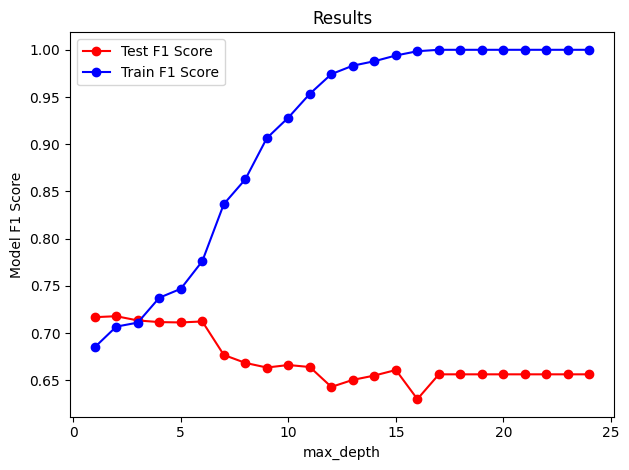

In [45]:
f1_test = []
f1_train = []
max_depth = list(range(1,25))
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i, random_state=100500, criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(klist=max_depth, f1_train=f1_train, f1_test=f1_test, xlabel='max_depth')

### Neular networks

In [16]:
from sklearn.neural_network import MLPClassifier

0.7169187401745541
0.7169187401745541
0.7148407148407148
0.7169187401745541
0.7156671311728853
0.7134499741503632
0.6187214611872146
0.714912175251075
0.7139589051515832
0.6336629764847587
0.7169187401745541
0.7210782006455083
0.7151877248964628
0.7151877248964628
0.7117054485475538
0.7078187038894308
0.7134499741503632
0.7169187401745541
0.719205744553657
0.7151877248964628
0.7169187401745541
0.7134499741503632
0.7169187401745541
0.7078187038894308
0.7165791407036544
0.7169187401745541
0.7200854700854701
0.7134499741503632
0.7169187401745541
0.7134499741503632


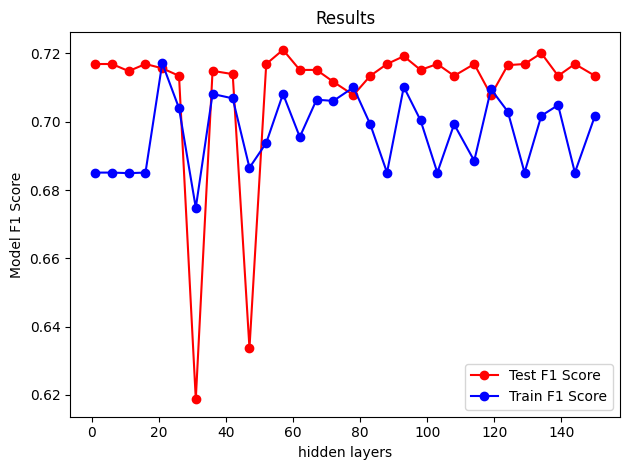

In [46]:
f1_test = []
f1_train = []
hlist = np.linspace(1,150,30).astype('int')
for i in hlist:
    clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='relu', learning_rate_init=0.05, random_state=100500)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(klist=hlist, f1_train=f1_train, f1_test=f1_test, xlabel='hidden layers')

### Boosted decision tree

In [36]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier

0.7169187401745541
0.7151877248964628
0.7151877248964628
0.7233831475076611


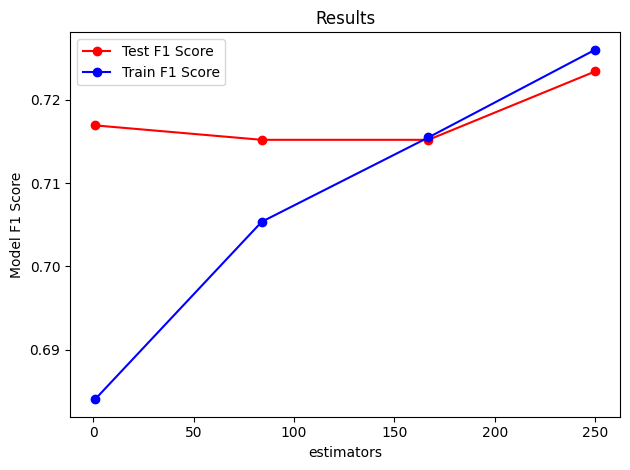

In [47]:
f1_test = []
f1_train = []
n_estimators = np.linspace(1,250,4).astype('int')
for i in n_estimators:
    clf = GradientBoostingClassifier(loss='log_loss', n_estimators=i, max_depth=1, random_state=100500)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(klist=n_estimators, f1_train=f1_train, f1_test=f1_test, xlabel='estimators')


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7169187401745541
0.6823824718442129
0.681060606060606


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6823824718442129


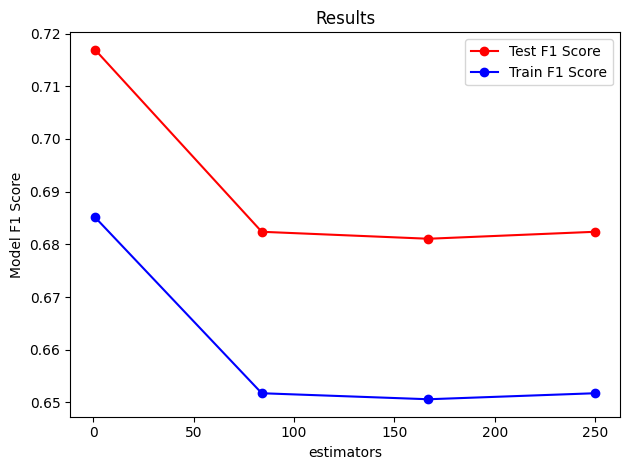

In [48]:
f1_test = []
f1_train = []
n_estimators = np.linspace(1,250,4).astype('int')
for i in n_estimators:
    clf = AdaBoostClassifier(n_estimators=i, random_state=100500)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(klist=n_estimators, f1_train=f1_train, f1_test=f1_test, xlabel='estimators')

### Support vector machines

In [20]:
from sklearn.svm import SVC

0.7165791407036544
0.7169187401745541
0.7169187401745541
0.7155785391079509


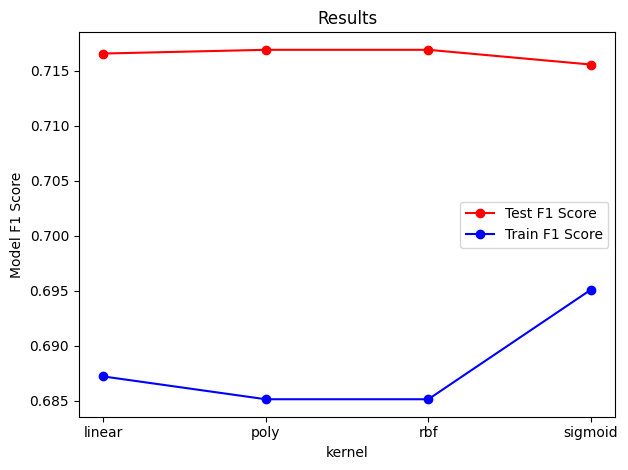

In [49]:
f1_test = []
f1_train = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = SVC(kernel=kernel, random_state=100500)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))    

show_model_results(klist=kernels, f1_train=f1_train, f1_test=f1_test, xlabel='kernel')

### k-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier as kNN

0.7009847295561582
0.7263827082008899
0.7195505816299085
0.7099541083916084
0.7169187401745541


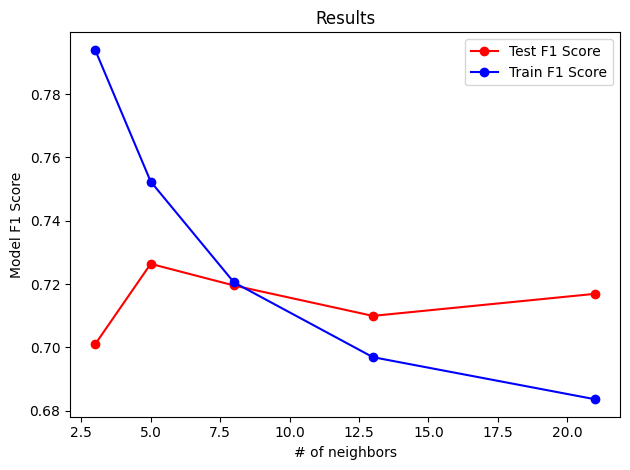

In [50]:
f1_test = []
f1_train = []
neighbors = [3, 5, 8, 13, 21]
for neighbor in neighbors:
    clf = kNN(n_neighbors=neighbor, n_jobs=-1)
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

show_model_results(neighbors, f1_test=f1_test, f1_train=f1_train, xlabel='# of neighbors')